In [41]:
import matplotlib.pyplot as plt

In [42]:
%matplotlib notebook

In [43]:
import numpy as np

In [53]:
def logk(x_new, a_x, k):
    l_k = 1
    for a in a_x:
        if a != x[k]:
            l_k = l_k*(x_new - a)/(x[k]-a)
    return l_k

In [54]:
def logrange(x_new,a_x,a_y):
    p = 0
    for k in range(len(a_y)):
        p = p + a_y[k]*logk(x_new, a_x, k)
    return p

<IPython.core.display.Javascript object>


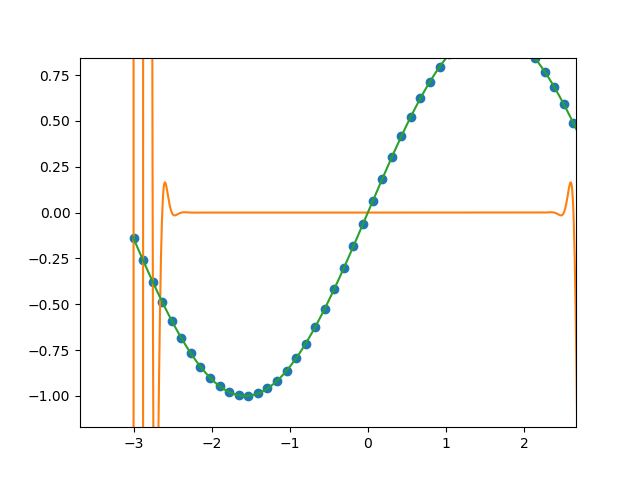

In [79]:
a_x = list(np.linspace(-3, 3, 50))
a_y = [np.sin(i) for i in a_x]
plt.plot(a_x, a_y, 'o')
x = np.linspace(-3.01, 3.01, 1000)
y = [logrange(a, a_x, a_y) for a in x]
plt.plot(x,y)
y_2 = [np.sin(i) for i in x]
plt.plot(x,y_2)
